# A primer on classification 

In the previous lecture we have learned about clustering algorithms, which, as we discussed, can be seen as a kinf of *unsupervised classification* (*unsupervised* because we identify clusters with similar properties but we do not have labels). If we have labels for the data points, we can utilize this information to relate the properties of the data sets. This process is called *supervised* classification. 

### Generative and discriminative classification

One often does a distinction between two different types of classification. As an example, suppose you are trying to differentiate whether your neighbor is speaking German or Flemish. You could either 1) learn both languages to understand their speech directly, or 2) grasp the key differences between the two languages. This same difference is at the hear of what is called "generative" (example 1) and "discriminative" classification (example 2). 

- When we're questioning which category is most likely to produce the observed outcome, we are employing probability **density estimation** for classification. This is what is known as **generative classification**. This involves *deriving the probability density associated with each category*. In this approach, we either possess a comprehensive model of the density for each class or a model that outlines how data could be generated from each class.

- Conversely, if we're unconcerned with the entire distribution, our approach resembles clustering, where we seek clusters of points in an n-dimensional space without needing to map the distribution: we are only interested in defining *boundaries* between classes. Classification that identifies the **decision boundary** separating classes is termed **discriminative classification**. For high-dimensional data, this approach might be preferable.

For example, in the figure below, to classify a new object with $x=1$, it would suffice to know that either 
1) model 1 is a better fit than model 2 (***generative classification***), or 
2) that the decision boundary is at $x=1.4$ (***discriminative classification***).

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)

## Generative Classification 

We have seen in the introduction lecture that with some assessment criteria defined, we can talk about use Bayes' theorem to relate the labels to the features in an $N\times D$ data set $X$. 

For an ensemble of $k$ (discrete) labels (or classes) $y = {y_1, ..., y_k}$, the Bayes formula is writen: 
$$ 
P(y_k | {\rm{features}}) = \frac{P({\rm{features}} | y_k) P(y_k) }{P({\rm{features}})}
$$ 

To be more formal: if we write the $j$th feature (out of $D$ features) of the $i$th point (out of $N$ points) $x^j_i$, and if there are $k$ classes giving discrete labels $y_k$, then the posterior associated to the label $y_k$ is given by: 

$$p(y_k|{\bf{x}}_i) = \frac{p({\bf{x}}_i|y_k)p(y_k)}{\sum_i p({\bf{x}}_i|y_k)p(y_k)},$$

where ${\bf{x}}_i$ is assumed to be a vector with $j$ components. 

As we have discussed in the introduction, we cannot in general calculate the likelihood from the data. For generative classifier, we use a model of the class conditional density $p({\bf x} | y = y_k)$. For a binary classification, $y_k$ can simply be $y_k = 0$ or $y_k=1$

But there is another term in the numerator of the Bayes theorem: $p(y=y_k)$. This is the probability of *any* point having class $k$. It is equivalent to the prior probability of the class $k$. 

As we have discussed in the introduction, the denominator is less critical because what matters is the ratio of posteriors between class e.g. 0 and 1. 

So, the problem reduces to doing density estimates (this is something we have learned how to do when dealing with clustering) and find the best one. 

Before we get into the generative classification algortithms, we'll first discuss 3 general concepts:
- (a) Discriminant Functions
- (b) Bayes Classifiers
- (c) Decision Boundaries

### (a) The Discriminant Function

**We can relate classification to density estimation** ([clustering lecture](../04_Clustering/04_clustering.ipynb)) and [**regression**](../02_Regression/Regression.ipynb). We need to find $\hat{y} = f(y~|~{\bf x})$ which represents the best guess of $y$ (our labels / the target) given ${\bf{x}}$ (the features). In other words, we have to optimize for finding the "best" estimator of a function that relates the targets (y) to the features (x). So, for binary labels, **classification is just regression with discrete $y$ values, e.g., $y=\{0,1\}$.**

In classification we refer to $f(y|x)$ as the [**discriminant function**](https://en.wikipedia.org/wiki/Discriminant_function_analysis).

For $y=\{0,1\}$, we have:

$$\begin{eqnarray}
g({\bf{x}}) = f(y|{\bf {x}}) & = &  \int y \, p(y|{\bf{x}}) \, \rm{d}y \\
%    & = & \int y p(y|x) \, dy \\
       & = & 1 \cdot p(y=1 | {\bf {x}}) + 0 \cdot p(y=0 | x) = p(y=1 | {\bf{x}}).
%     & = & p(y=1 | x)
\end{eqnarray}
$$

Note in the above expression, you may recognise the definition of the expectation value (mean) of a RV (here, you search for a function which is an estimator of the "mean" value of y):  
$$
E(x) \, = \, \int x\,h(x)\,{\rm d}x
$$

Then using Bayes' rule we have:

$$g({\bf{x}}) = \frac{p({\bf{x}}|y=1) \, p(y=1)}{p({\bf{x}}|y=1) \, p(y=1)  + p({\bf{x}}|y=0) \, p(y=0)}$$

The figure above shows the two discriminant functions (for 2 classes) $g_1(x)$ and $g_2(x)$ in the case of a single (continuous) feature $x$.

### (b) Bayes Classifier

If the discriminant function gives a binary prediction, we call it a **Bayes classifier**, formulated as

$$\begin{eqnarray} \widehat{y} & = & \left\{ \begin{array}{cl}       	           1 & \mbox{if $g({\bf x}) > 1/2$}, \\       	           0 & \mbox{otherwise,}       	           \end{array}     	   \right. \\     & = & \left\{
\begin{array}{cl}               1 & \mbox{if $p(y=1|{\bf x}) > p(y=0|{\bf x})$}, \\               0 & \mbox{otherwise.}               \end{array}       \right.\end{eqnarray}$$

Where this can be generalized to any number of classes, $k$, and not just two.

### (c) Decision Boundary

A **decision boundary** is just set of $\bf{x}$ values at which each class is equally likely:

$$
p({\bf{x}}|y=1)p(y=1)  =  p({\bf x}|y=0)p(y=0);
$$

$$g_1({\bf{x}}) = g_2({\bf{x}}) \; {\rm or}\; g({\bf{x}}) = 1/2$$

The decision boundary was shown in the figure (above) showing the difference between generative and discriminative classification. 

Hence, if we plug a model of $p({\bf {x}} | y = y_k)$ in the discriminant function, we have a method to classify objects. 

## Naive Bayes 

We have seen the Naive Bayes in the [first lecture](../01_Intro_ML/Introduction_ML.ipynb), but let's formalise it a bit more. 

In practice, classification is complicated as the data are generally multi-dimensional (that is we don't just have $x$, we have $x^{j=0},x^1,x^2,x^3...x^N$, so we want $p(x^0,x^1,x^2,x^3...x^N|y)$.

Naive Bayes is defined for discrete features $\{x\}$. If we **assume** that ***all attributes are conditionally independent*** (which is not always true, but is often close enough), then multi-dimensional pdfs simplify to

$$ p(x^i,x^j|y_k) = p(x^i|y_k)p(x^j|y_k)$$
  
which can be written as

$$ p({x^{j=0},x^1,x^2,\ldots,x^N}|y_k) = \prod_j p(x^j|y_k).$$

From Bayes' rule and conditional independence we get

$$
  p(y_k | {x^0,x^1,\ldots,x^N}) =
  \frac{\prod_j p(x^j|y_k) p(y_k)}
       {\sum_l \prod_j p(x^j|y_l) p(y_l)}.
$$

We calculate the most likely value of $y$ by maximizing this over choices of $y_k$:

$$
\hat{y} = \arg \max_{y_k} \frac{\prod_j p(x^j|y_k) p(y_k)}
        {\sum_l \prod_j p(x^j|y_l) p(y_l)},
$$


From there the process is just estimating densities: $p(x|y=y_k)$ and $p(y=y_k)$ are learned from a set of training data, where
- **$p(y=y_k)$ is just the frequency of the class $k$**
- **$p(x|y=y_k)$ is just the density (probability) of an object with class $k$ having the attributes $x$**

Note that this "Naïve Bayes", despite of using the Bayes theorem, is effectively a frequentist approach using the bayes theorem: the priors are derived from the data, it is not truely priori information.  

## Gaussian Naive Bayes 

One way to handle continuous values for $X$ is to model $p(x^j|y=y_k)$ as one-dimensional normal distributions, with means $\mu^j_k$ and widths $\sigma^j_k$. The naive Bayes estimator is then

$$\hat{y} = \arg\max_{y_k}\left[\ln p(y=y_k) - \frac{1}{2}\sum_{j=1}^N\left(2\pi(\sigma^j_k)^2 + \frac{(x^j - \mu^j_k)^2}{(\sigma^j_k)^2} \right) \right]$$

In Scikit-Learn [`Gaussian Naive Bayes`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) classification is implemented as follows, with a simple example given in the next cell. You have applied this Gaussian Naive Bayes to data set in the [introduction lecture](../01_Intro_ML/Introduction_ML.ipynb)

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt 

X = np.random.random((100,2))
y = (X[:,0] + X[:,1] > 1).astype(int) #Class 1 if sum of both features is >1

gnb = GaussianNB()
gnb.fit(X,y)

y_pred = gnb.predict(X)

In [2]:
# Ivezic v2, Figure 9.2, edits by GTR and SRT, DS 
# Author: Jake VanderPlas 
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import colors
from sklearn.naive_bayes import GaussianNB

#------------------------------------------------------------
# Simulate some data:
# 2 clusters of points drawn from 2 multivariate distributions
# Cluster 1 centered on (1, 1) and with sigma_1 = sigma_2 = 0.3
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)  # eye = Identity matrix of 2x2 

# Cluster 2 centered on (1, 1) and with sigma_1 = 0.4, sigma_2 = 0.1
# no covariance between x_1 and x_2 
mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1
#------------------------------------------------------------

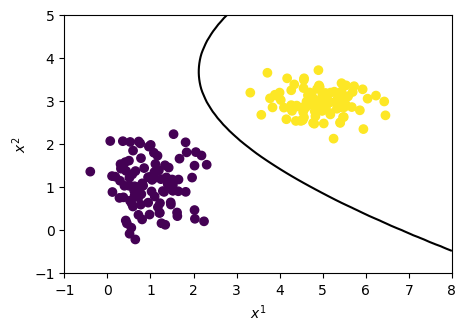

In [4]:
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid 
xlim = (-1, 8)
ylim = (-1, 5)
nx, ny = 71, 81   # number of grid points for x1, x2
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], nx),
                     np.linspace(ylim[0], ylim[1], ny))
#Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])   # column stacking 
Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))   # more standard command for col. stacking

# Z gives probability for both class 1 and class 2 for each grid point
# Z has a shape (nx X ny, 2), i.e. 71*81 = (5781, 2)
# As it is binary Z[i, 0] + Z[i, 1] = 1 => for visualising we can
# re-shape Z to the grid pattern needed for contour plotting
# and focus on one of the 2 probabilities (col.[0] or col[1] of Z)
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, zorder=2)

# Add the decision boundary, which is just the contour where
# the probability exceeds some threshold, here 0.5.
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x^1$')
ax.set_ylabel('$x^2$')
ax.set_aspect('equal')
plt.show()

In [5]:
np.array([xx.ravel(), yy.ravel()]).T

array([[-1.        , -1.        ],
       [-0.87142857, -1.        ],
       [-0.74285714, -1.        ],
       ...,
       [ 7.74285714,  5.        ],
       [ 7.87142857,  5.        ],
       [ 8.        ,  5.        ]], shape=(5751, 2))

In [6]:
yy

array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-0.925, -0.925, -0.925, ..., -0.925, -0.925, -0.925],
       [-0.85 , -0.85 , -0.85 , ..., -0.85 , -0.85 , -0.85 ],
       ...,
       [ 4.85 ,  4.85 ,  4.85 , ...,  4.85 ,  4.85 ,  4.85 ],
       [ 4.925,  4.925,  4.925, ...,  4.925,  4.925,  4.925],
       [ 5.   ,  5.   ,  5.   , ...,  5.   ,  5.   ,  5.   ]],
      shape=(81, 71))

The "*naive*" in Naive Bayes refers to the fact that we are assuming that all of the variables are conditionally independent. If we relax that assumption and allow for covariances, then we have a **Gaussian Bayes classifier**. But this comes with a large jump in computational cost. If you are interested by those classifier, you may look at two special cases of Gaussian classifiers, which are called [Linear Discriminant Analysis (LDA)](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [Quadratic Discriminant Analysis (QDA)](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis). Compared to the general formulation of Gaussian classifiers, those have closed-form solution by making assumptions on the covariance. The LDA assumes that the covariances are the same for each class distribution, while the QDA ignores that requirement. 

`LDA` and `QDA` are implemented in `sklearn.discriminant_analysis`. See this link [https://scikit-learn.org/stable/modules/lda_qda.html](https://scikit-learn.org/stable/modules/lda_qda.html) for details

## GMM and Bayes Classification 

Our classifications so far have made some restrictive assumptions. Either
- conditional independence, or 
- Gaussianity of the distributions.  

However, a more flexible model might improve the completeness and efficiency of the classification. For that we can remember of density estimation techniques.

The natural extension of the Gaussian assumptions is to use GMM's (Gaussian Mixture Models) to determine the density distribution, i.e., a **GMM Bayes Classifier**. Note that the *number of Gaussian components, $K$, must be chosen for each class*, $k$, independently.

`astroML` implements GMM Bayes classification as:


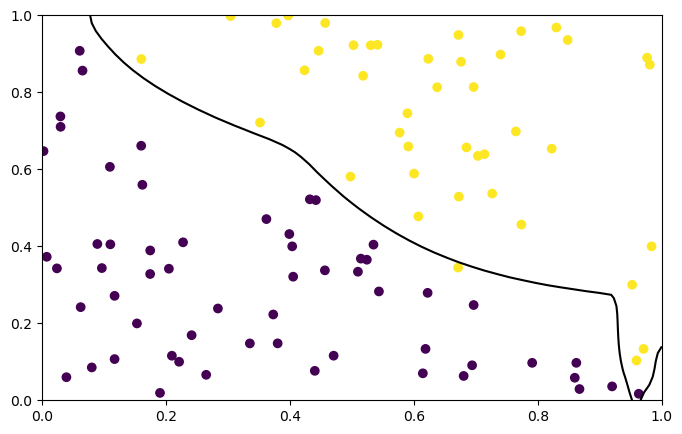

In [7]:
from astroML.classification import GMMBayes
#from astroML.classification import GaussianMixture as GMMBayes

X = np.random.random((100,2))
y = (X[:,0] + X[:,1] > 1).astype(int)

# 3 clusters per class 

#gmmb = GMMBayes(3) 
# But you can feed a list with a different number of clusters for each class 
gmmb = GMMBayes([2, 4]) 

gmmb.fit(X,y)

y_pred = gmmb.predict(X)
y_proba = gmmb.predict_proba(X)

f, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.scatter(X[:,0], X[:,1], c=y, marker='o')

# grid to evaluate the proba
nx, ny = 50, 50
xx, yy = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))
y_proba_grid = gmmb.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))
y_proba_grid = y_proba_grid[:, 1].reshape(xx.shape)
ax.contour(xx, yy, y_proba_grid, [0.5], colors='k')


A risk of this approach is to have overfitting ... this will be easy to find out thanks to test set ! 

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise** Back to the RR-lyrae exercise from the [Introduction](../01_Intro_ML/Introduction_ML.ipynb). 

* Fetch the rrlyrae and rearrange the features using:
```python
X, y = fetch_rrlyrae_combined() # X is a 4-D color-color-color-color space
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results -> 4 columns are 'g-r', 'u-g', 'r-i', 'i-z'
```
* Calculate the completeness, contamination and accuracy of the 4 classifiers using 1, 2, 3, 4 colors. Compare the performances of the Naive Gaussian Bayes, LDA, QDA, and Gaussian Mixture. For the latter compare the cases with (a) one component; (b) 3 components. 
* For each case, plot the decision boundary when only the first 2 features are considered. 

**NOTE:** About the use of GMM for clustering: we can take this to the extreme by having one mixture component at each training point. We also don't have to restrict ourselves to a Gaussian kernel, we can use any kernel that we like. The resulting ***non-parametric*** Bayes classifier is referred to as **Kernel Discriminant Analysis (KDA)**. 

It seems like this would be a *lot* more computationally intensive, but now we don't have to optimize the locations of the components, we just need to determine the bandwidth of the kernel. In the end, it can result in better classification. 

One of the tricks to speed things up is that we don't need to know the actually class probability, we just need to know which is larger.  This is explained in more detail in [Riegel, Gray, & Richards 2008](http://epubs.siam.org/doi/abs/10.1137/1.9781611972788.19), and it is implemented in a series of papers starting with [Richards et al. 2004](http://adsabs.harvard.edu/abs/2004ApJS..155..257R).  

## K-Nearest Neighbor Classifier

If we did KDA with a variable bandwidth that depended only on the distance of the nearest neighbor, then we'd have what we call a **Nearest-Neighbor** classifier. Here if $x$ is close to $x'$, then $p(y|x) \approx p(y|x')$, i.e. **we use the class label of the nearest point**. Note that we have not assumed anything about the conditional density distribution, so it is completely non-parametric. This is a *widely used* method, but due to its non parametric nature, it works best when the data set is large (such that the feature space is well covered by data). 

The number of neighbors, $K$, regulates the complexity of the classification, where a **larger $K$ decreases the variance** in the classification but leads to an **increase in the bias**. In the simplest form, a majority rule classification is adopted, where each of the $K$ neighbors votes on the classification (N.B., the 3rd different use of $K$ or $k$ in this notebook!).

The distance measure is usually N-dimensional Euclidean. However, if the attributes have very different properties, then normalization, weighting, etc. may be needed.

Scikit-learn implements **[`K-Nearest Neighbors`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classification** as

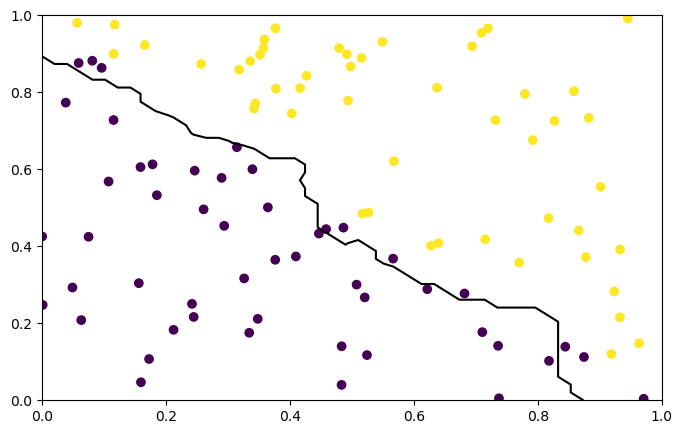

In [8]:
from sklearn.neighbors import KNeighborsClassifier

X = np.random.random((100,2))
y = (X[:,0] + X[:,1] > 1).astype(int)

kneighbours = 4  # Change to see the output
knc = KNeighborsClassifier(kneighbours) 
knc.fit(X,y)

y_pred = knc.predict(X)
y_proba = knc.predict_proba(X)

f, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.scatter(X[:,0], X[:,1], c=y, marker='o')

# grid to evaluate the proba
nx, ny = 50, 50
xx, yy = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))
y_proba_grid = knc.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))
y_proba_grid = y_proba_grid[:, 1].reshape(xx.shape)
ax.contour(xx, yy, y_proba_grid, [0.2], colors='k')

By changing the number of neighbours we see that a small number of neighbours likely produces some bias (this can be quantified with cross validation), while larger number of neighbours yields more bias. 

#### Supplementary exercise: 

Apply the KNNClassifier to the RR-Lyrae data. 

## Assessing your results 

Let's complete our scheme for assessing results of classification. In the first lecture, we have learned how to calculate completeness (or True Positive Rate, or recall or sensitivity) and contamination (or False discovery rate) based of the confusion matrix: 

|N  | 1 (truth)| 0 (truth)  |   
|---|----|----|
| 1 (predicted)| True Positive = TP | False Positive = FP |
| 0 (predicted)| False Negative = FN | True Negative = TN | 


Based on these, we usually define either of the following pairs of terms.  Which is used is largely a matter of preference in different fields (astronomy often uses completeness and contamination).

| Name| Formula   | Definition        | Usage |  
| --- |-----------|-------------------|------|
|**Completeness** or **True Positive Rate (TPR)** or **sensitivity** or **RECALL** | $\frac{\rm TP}{\rm TP + FN}$ |  Fraction of positive instances correctly identified | ML, Astro | 
|**Contamination** of **False DISCOVERY rate** | $\frac{\rm FP}{\rm TP + FP}$ |  Fraction of positive instances incorrectly identified | Astro |
| **False positive rate (FPR)**| $\frac{\rm FP} {\rm TN + FP}$ | Fraction of negative instances falsely classified as positive | ML, Astro | 
| **Accuracy**| $\frac{\rm TP + TN } {\rm N}$ | Fraction of instances correctly classified| ML, Astro | 
| **Precision** $\equiv$ 1-contamination| $\frac{\rm TP} {\rm TP + FP}$ | Fraction of positive instances among the predicted positive | ML, Astro | 


|![](../Figures/False_True_positive_sketch.png) | ![](../Figures/Precision_recall_Sketchonly.png)| 
|-------------------------|----------------------| 

(c) [Wikipedia](https://en.wikipedia.org/wiki/File:Precisionrecall.svg)

To anchor the meaning of those quantities, let's take an example.  

You have 100000 stars and 1000 quasars but you do not know which are which. Fotunately, you have devised a classifier that correctly identifies 900 quasars as such and mistake 1000 stars for quasars. In that case, we have:

| N = 101000 | QSO (truth) | Star (truth)| 
| -----------|------|------|
| QSO (predicted)   | TP = 900  | FP = 1000 | 
| STAR (predicted)  | FN = 100 | TN = 99000 | 

Which gives

$$
{\rm true\ positive\ rate} = \frac{900}{900 + 100} = 0.9 = {\rm completeness}
$$

$$
{\rm false\ positive\ rate} = \frac{1000}{99000 + 1000} = 0.01
$$

$$
{\rm Accuracy} =  \frac{900 + 99000}{101000} = 0.989 
$$

Not bad right?  Well, sort of.  The FPR isn't bad, but there are *lots* of stars, so the contamination (or false discovery rate) isn't so great.

$$
{\rm contamination} = \frac{1000}{900 + 1000} = 0.53
$$

The **precision** of your classifier is simpy 900/1900 = 1-contamination, so you have 47% precision. 

Note that when, in the real life, you have much more objects of one class compared to the other, one speaks of "imbalanced" data set, because the balance between the 2 classes is largely in favour of 1 class compared to the other. To quantify this imbalancing, one sometimes calculate the prevalence (this is very much used in epidemiology -with a slightly different meaning-, but one uses as well in astronomy) of a "phenomenon / event / class". In this example, for a population of point-like sources, the prevalence of quasars over stars is 1000:100000 = 1%. For such a large inbalancing, you know that, without any classifier, if you pick an object at random you have only 1% chance that it will be a quasar. So, if you want to do better than the chance, you'll need to increase the precision!  

Depending on your goals, you may want to maximize the completeness or the efficiency, or a combination of both. In the latter case, the [F-score](https://en.wikipedia.org/wiki/F-score) provides an interesting metric: it is the harmonic mean between precision ($\equiv$1-contamination) and recall (=completeness): 

$$
F_1 = \frac{2}{{\rm {recall}}^{-1} + {\rm {precision}}^{-1}} = 2\, \frac{{\rm {recall}} * {\rm {precision}}}{{\rm {recall}} + {\rm {precision}}}
$$

If you do not want to give the same weight to both, you can use the $F_\beta$ score (see [sklearn.metric.fbeta_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html)): 

$$
F_\beta = (1 + \beta^2) \frac{{\rm {recall}} * {\rm {precision}}}{{\rm {recall}} + \beta^2 * {\rm {precision}}}
$$


Here is an alternative visual summary of those quantities with naming often used in machine learning
![](../Figures/ClassificationJPG.JPG)

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> **TIP:** Check out the various functions implemented in scikit-learn to calculate [scores](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) and classification [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

A simple one that summarizes the output of several metrics is: [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

### Receiver Operating Characteristic curve aka ROC curve 

"Best" performance is subjective; we trade contamination versus completeness depending on the science. (See Sect. 9.9 of our [Izevic et al.](#book)).  

We do this with a [**Receiver Operating Characteristic (ROC)**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve. **A ROC curve simply plots the true-positive rate (or recall) vs. the false-positive rate.**

One concern about ROC curves is that they are sensitive to the relative sample sizes. As we already demonstrated above, **if there are many more background events than source events, small false positive results can dominate a signal.** For these cases ***we can plot completeness versus precision (1-contamination).***

Here is a comparison of the two types of plots (The different labels, they correspond to various classifiers for a specific problem ; See [astroML website](https://www.astroml.org/astroML-notebooks/chapter9/astroml_chapter9_Classification.html#comparing-the-performance-of-classifiers) for the code generating this figure):
![](../Figures/ROC_completeness_precision.png)

The left panel is our ROC curve. It is common to set the FPR between 0 and 1, in which case the "diagonal" is the situation where your FPR = TPR, so this is what you would get for a model that has *no discrimination* capacity between the 2 classes. If your classifier has some discriminative power, it *should be above* that "chance diagonal". At the other extreme, the perfect classifier would have a completeness of 1 whatever the chosen threshold (hence whatever the FPR). This rarely exist (or if it exists, it means that you probably not need to do machine learning to classify your objects !). 

The **Area Under the Curve (AUC)** (effectively the area under the ROC curve) is a way to quantify the discriminative power of your classifier. In short, it tells you, when you take a threshold of 0.5, what is the percentage of objects correctly classified (see also [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) for a quick illustration).   

We see from the right panel that it is generally difficult to get high completeness and precision (1-contamination). In the example above, if you were selecting a precision of 75% for your best classifier (GMMB) you would have about 75% completeness. This might be a good trade of if you were obtaining follow-up data to confirm the nature of your candidate. It would mean that out of 4 follow-up observation, you would have 75% of chance of confirming the object (precision), while keeping a rather good completeness. If you want to increase the precision (let's say that you want only 1/10 wrong classification, then you will have to accept to reduce your completeness below 50%. 

Note that you ***choose*** the completeness and precision that you want by choosing a **threshold (decision boundary)**. The curves show you what your possible choices are (depending on where you set the threshold). 

The following scikit-learn modules allow you to generate ROC and precision-recall curves: 
- [sklearn.metrics.roc_curve(y_test, y_prob)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.precision_recall_curve(y_test, y_prob)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise** 

Calculate the ROC curve for the Gaussian Naive Bayesian classifier and for the Gaussian Mixture classifier (only for the 4 colors case). 

**BONUS** Write your code in such a way that you can loop over multiple classifiers and display the results. Apply your code to display the ROC curve of the various generative classifiers that we have used. 

## Discriminative Classification 

In the first part, we have seen how to perform classification by mapping the full pdf of the data's feature space, and probabilistically ranking the population that a new sample would belong to. This was **generative classification**, because we we estimating a generative model of the data. 

This time we will concentrate on methods that seek only to determine the **decision boundary** in feature space, so called [**discriminative classification**](https://en.wikipedia.org/wiki/Discriminative_model) methods.

As before, let's say that you have 2 blobs of data as shown below. In many cases, you might say "just draw a line between those two blobs that are well separated". So let's do exactly that in the example below. There are clearly lots of different lines that you could draw that would work.  So, how do you do this *optimally*?  And what if the blobs are not perfectly well separated?

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

(-1.0, 3.5)

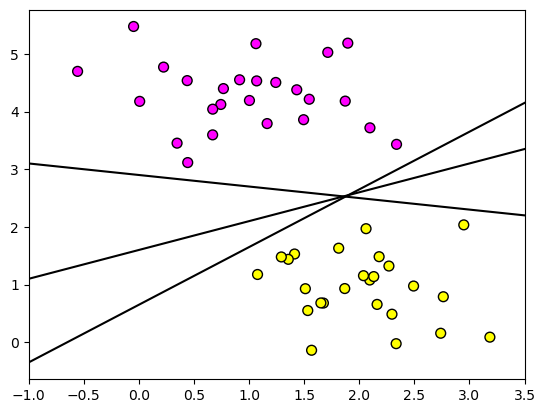

In [10]:
# Source: https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/04.1-Classification-SVMs.ipynb
import numpy as np
from scipy import stats
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring' ,edgecolor='k');

Xgrid = np.linspace(-1, 3.5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(Xgrid, m * Xgrid + b, '-k')
    
plt.xlim(-1, 3.5)

## Support Vector Machines 

**[Support Vector Machines (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine)** define a hyperplane (a plane in $N-1$ dimensions) that maximizes the distance of the closest point from each class. This distance is the "margin". It is the width of the "cylinder" or "street" that you can put between the closest points that just barely touches the points in each class. The points that touch the margin (or that are on the wrong side) are called **support vectors**.  Obvious, right? And not as obscure as the name may imply. 

![svm.png](../Figures/SVM_data_science.png)

Image credit: [here](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

There are lots of potential decision boundaries, but we want the one that maximize the distance of the support vectors from the decision hyperplane.

(-1.0, 3.5)

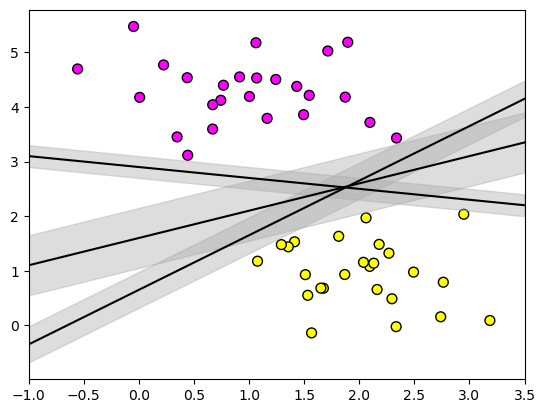

In [11]:
Xgrid = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], 
            c=y, s=50, cmap='spring', 
            edgecolor='k')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * Xgrid+ b
    plt.plot(Xgrid, yfit, '-k')
    plt.fill_between(Xgrid, yfit - d, yfit + d, 
                     edgecolor='None', 
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

We'll skip over the mathematical details, but you can read about them in detail in Ivezic et al. $\S$ 9.6. 

The Scikit-Learn implementation of SVM classification is [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) which looks like:

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0) # will explain 'C' below
svm.fit(X,y)

SVC(kernel='linear')

In order to better visualize what SVM is doing, let's create a convenience function that will plot the decision boundaries:

In [13]:
def plot_svc_decision_function(clf, ax=None):
    """
    Description: 
    Plot the decision function for a 2D Support Vector Classifier

    parameters: 
    clf: sklearn estimator (in practice, this should be 
        an sklearn.svm.SVC() instance
    ax: optional axis object used for the plotting. 
        In None, will use existing axis figure and its limits to 
        draw the SVC decision function
    """
    if ax is None:
        ax = plt.gca()
    u = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    v = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    yy, xx = np.meshgrid(v, u)

    P = np.zeros_like(xx)
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            Xgrid = np.array([ui, vj])
            P[i, j] = clf.decision_function(Xgrid.reshape(1,-1))[0]
    return ax.contour(xx, yy, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

Now let's plot the decision boundary and the support vectors, which are stored in the `support_vectors_` attribute of the classifier.

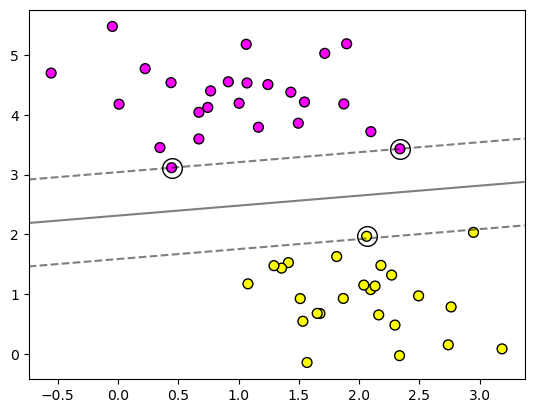

In [14]:
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=200, edgecolor='k', facecolor='w'); #Add support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap='spring', edgecolor='k')
plot_svc_decision_function(svm)

What happens if there is overlap between data classes? 

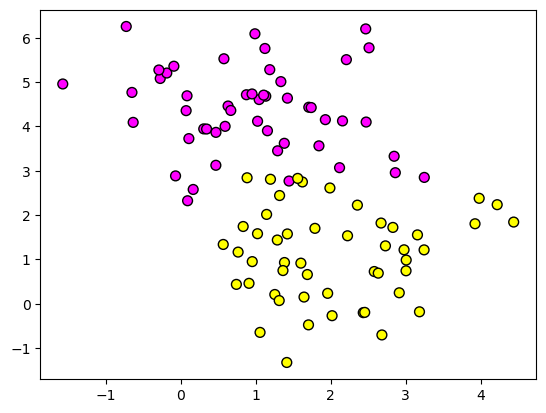

In [15]:
# Source: https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/04.1-Classification-SVMs.ipynb
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap='spring' ,edgecolor='k');

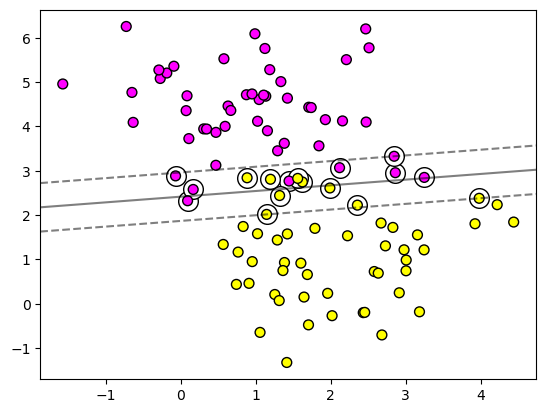

In [16]:
svm.fit(X,y)

plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=200, edgecolor='k', facecolor='w'); #Add support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap='spring', edgecolor='k')
plot_svc_decision_function(svm)

Our example above included a parameter, $C$, which I didn't explain. According to the [SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC), 

> $C$ is a "*regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared L2 penalty.*"

Penalty is a synonym of loss function (that we also called merit function). The L2 norm is equivalent to the mean square error seen in the context of [regression](../02_Regression/Regression.ipynb). 

$$
L2 = \sum_{k=1}^{N} (y_{k, \rm{true}} - y_{k, \rm{predicted}})^2
$$

Note that L2 is "2" because of the square. One defines L1 loss as: 
$$
L1 = \sum_{k=1}^{N} |y_{k, \rm{true}} - y_{k, \rm{predicted}}|
$$
These notations come from the definitions of the norm of complex vectors.  

Let's see what happens when we change it.  Fit these data with `C=100` (less regularization) and `C=0.01` (more regularization).

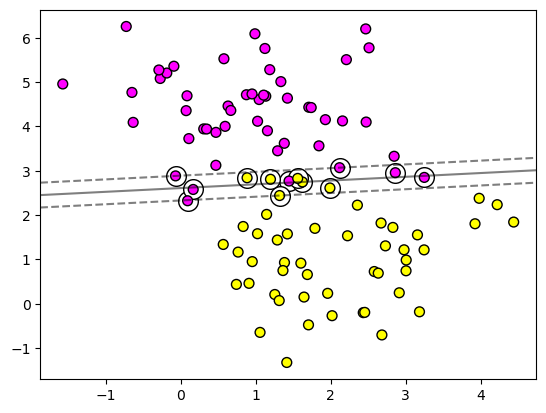

In [17]:
svm = SVC(kernel='linear', C=100.01)
svm.fit(X,y)

plt.scatter(svm.support_vectors_[:, 0], 
            svm.support_vectors_[:, 1], 
            s=200, edgecolor='k', facecolor='w');
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap='spring', edgecolor='k')
plot_svc_decision_function(svm)

- We see that **$C$ controls the number of "margin violations"** that are allowed, and the width of the "street" that runs between the data (i.e., the number of support vectors). Large values of $C$ means a narrow "street" (and small number of support vector), while small $C$ means large "street" (and small number of support vector). Larger $C$ hence means larger regularisation, which may be needed if you have relatively *noisy* data. 

- **SVM *only* depends on the support vectors**. You can get rid of the rest of the data and SVM will not change. Due to this feature, SVM often ensures a large completeness but is also associated with potentially large contamination.

- This is not illustrated above but SVM is generally pretty effective in high dimensional space, and is memory efficient because it only takes subsets of training points in the decision function. The sklearn implementation can however be time consuming. For fine-tuning parameters, consider to randomly pick a representative subsample of objects in your original data set, and re-do the experiment with the whole data set for a final run. Another tip consists, if you have enough RAM, to increase the `cache_size` (default is 200 (Mb) but you can go to 500 (Mb) or more if you have enough RAM). See [sckitlearn page](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use) for other tips. 

-  SVM is not too sensitive to imbalancing of data classes because it simply determines the best boundary between 2 classes based on the overlap between the 2 classes. his 

- Atlhough SVM is not too sensitive to imbalancing of data classes (because it simply determines the best boundary between 2 classes based on their overlap), it is ***not* insensitive to the class balance**. In case of strong un-balancing, it happens that no True Negative / False positive is pedicted. To fix this, the scikit-learn implementation of SVC enables the use of the argument `class_weight='balanced'` to automatically reweight the classes. 

-  **SVM is not scale invariant** so it is often worth rescaling the data to [0,1] or "renormalize" to have a mean of 0 and variance 1 (remember to do this to the test data as well!). To rescale your data, you can use `sklearn.preprocessing.StandardScaler()`

- There is no formal calculation of the probabilities of the predictions (i.e., what is the probability of a point to be in class $k$) with the `scikit-learn` implementation of the SVM. To have an estimate of the probabilities associated to each class, one needs to set the argument `probability=True` when instantiating the SVC. This argument internally uses 5-fold cross-validation to get an estimate of the probabilities. This slows down the fitting process. 

- Our illustration of the SVM got limited to *straight-line decision boundaries*. There is a possibility to have "non-linear" decision boundaries by [transforming the data with a kernel](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation) to make them linearly separable. The argument `kernel` of `SVC` enables one to choose among different kernels (linear, polynomial, rbf and sigmoid ). Those kernel may sound familiar to you as we encountered them in the context of [Gaussian Process Regression](02_Regression/Regression.ipynb#Gaussian-Process-Regression-(GPR)).

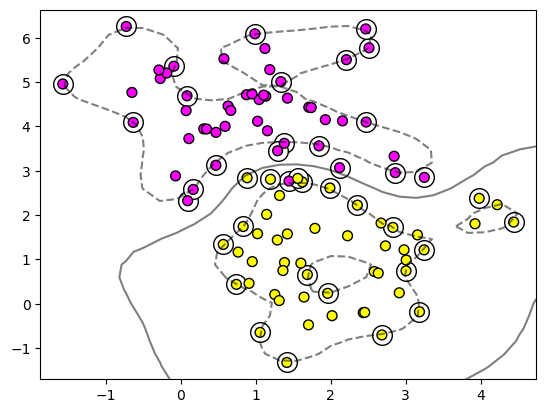

In [18]:
svm = SVC(kernel='rbf', gamma=1)
svm.fit(X,y)

plt.scatter(svm.support_vectors_[:, 0], 
            svm.support_vectors_[:, 1], 
            s=200, edgecolor='k', facecolor='w');
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap='spring', edgecolor='k')
plot_svc_decision_function(svm)

A more intuitive example of why the kernel can make a great job. 

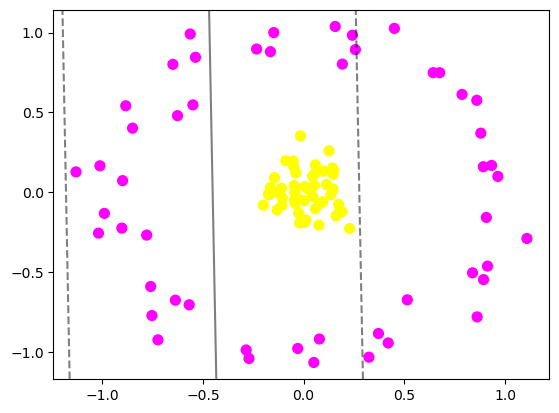

In [19]:
# from https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/04.1-Classification-SVMs.ipynb
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

A common kernel that can be used is the radial basis function (`rbf`) which is a "squared exponential": 
```python
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
```

We see below that if we transform the data with such a kernel, we can easily separate the 2 classes ! Essentially, for this problem, we define a new feature that is related to the square of the input features. The kernel trick implemented in SVM is more sophisticated but the illustration below shows why this "kernel trick" can work. 

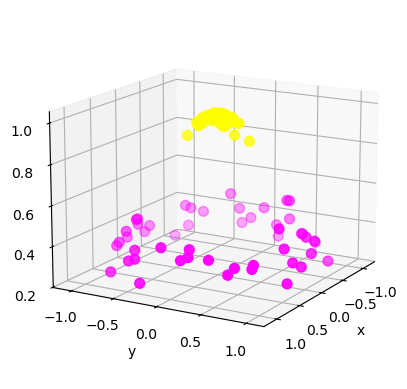

In [20]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3D(elev=+15, azim=30)

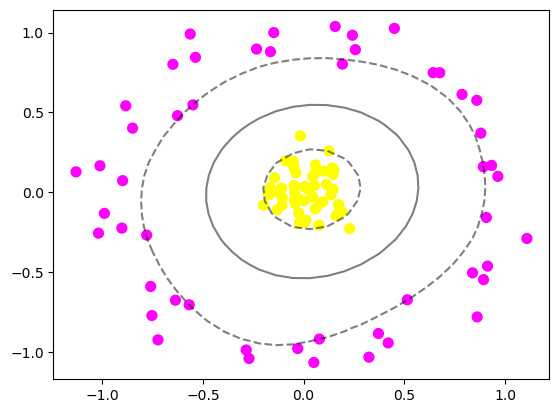

In [21]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise** 

Apply the SVM to the RR-Lyrae sample. This is rather time consuming, so consider working with a subsample (e.g. 1/5 of the total sample) to speed things up. A simple way to truncate the original sample is to do 
```python
X_trunc, y_trunc = X[::5], y[::5]
```

## Decision Trees 

A [**decision tree**](https://en.wikipedia.org/wiki/Decision_tree) is similar to the process of classification that you might do by hand: 

- define some criteria to separate the sample into 2 groups (not necessarily equal),
- then take those sub-groups and do it again.  
- keep going until you reach a stopping point such as not having a minimum number of objects to split again.  

In short, we have done a *hierarchical application of decision boundaries* (decision boundary is the criterion used to separate the sample into 2 subsets).

The tree structure is as follows:
- top node contains the entire data set
- at each branch the data are subdivided into two child nodes 
- split is based on a predefined decision boundary (usually axis aligned)
- splitting repeats, recursively, until we reach a predefined stopping criteria 

Below is a simple example of a decision tree.

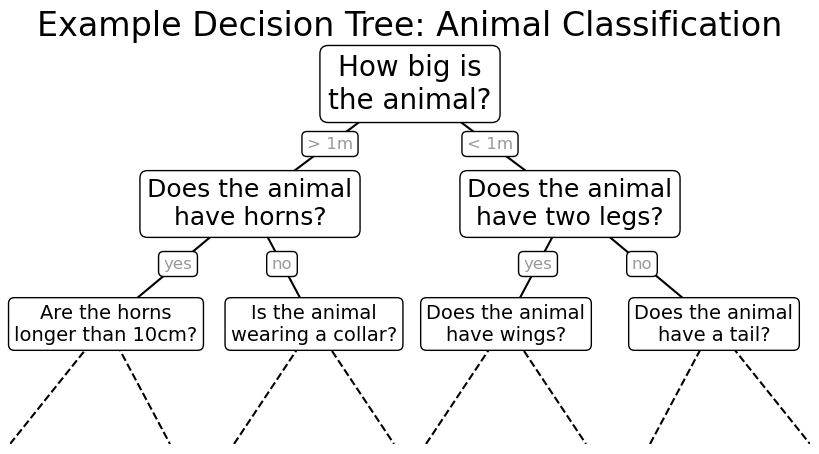

In [22]:
# Source: Jake VanderPlas, https://github.com/LocalGroupAstrostatistics2015/MachineLearning/blob/master/fig_code/figures.py
def plot_example_decision_tree():
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
    ax.set_title('Example Decision Tree: Animal Classification', size=24)

    def text(ax, x, y, t, size=20, **kwargs):
        ax.text(x, y, t,
                ha='center', va='center', size=size,
                bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

    text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
    text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
    text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
    text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
    text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
    text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
    text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

    text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
    text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

    text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

    text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

    ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
    ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
    ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
    ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
    ax.axis([0, 1, 0, 1])

plot_example_decision_tree()

The **terminal nodes ("leaf nodes")** record the fraction of points that have one classification or the other in the training set.

Application of the tree to classification is simple-- just a series of binary decisions. The fraction of points from the training set classified as one belonging to one class or the other (in the leaf node) defines the class associated with that leaf node.

The binary splitting makes this extremely efficient. The trick is to ask the *right* questions. So, decision trees are simple to interpret (just a set of questions).

Scikit-learn implements the [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) as follows:

In [23]:
from sklearn.tree import DecisionTreeClassifier

X = np.random.random((100,2))
y = (X[:,0] + X[:,1] > 1).astype(int)

dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X,y)

y_pred = dtree.predict(X)
print(dtree.get_depth())
print(dtree.get_n_leaves())

5
12


Let's apply the decision tree to our beloved Iris data set. 

Depth of the classification: 4
Final number of leafs:  7
Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9555555555555556
Confusion Matrix - Train: 
 [[33  0  0]
 [ 0 35  0]
 [ 0  0 37]]

 Confusion Matrix - Test: 
 [[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]


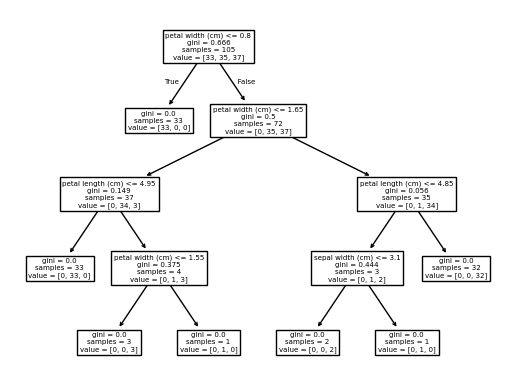

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve 
from sklearn.tree import plot_tree
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 2)

dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

y_pred_train = dtree.predict(X_train)
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)

print("Depth of the classification:", dtree.get_depth())
print("Final number of leafs: ", dtree.get_n_leaves())

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

plot_tree(dtree, feature_names=iris.feature_names); 

Note here that there is overfitting (because the accuracy of the training is 1 and is higher than the one of the test). This may be due to the depth "of the tree" (i.e. the number of levels of the classification). Sklearn derives "an optimal number of levels" by stopping adding when there is no more split possibles (all leaves are said *pure*). 
We see that the last split splits a very small number of objects. This is likely the reason for overfitting. As we will see below, we can reduce the overfitting by setting a lower depth for the tree or a minimum number of objects per leaf. 

### Splitting Criteria

Now let's talk about the best ways to split the data. 

One way is to use the **information content (or "entropy")**, $E(x)$, of the data

$$ E(x) = -\sum_i p_i(x) \ln (p_i(x)),$$

where $i$ is the class and $p_i(x)$ is the probability of an "object" $x$ to be in that class given the training data. We can define the **information gain** as the reduction in entropy due to the partitioning of the data (i.e. you compare the entropy between the parent node and the sum of entropies of child nodes). The idea is that by partitioning the data you have reduced the disorder. For a binary split with $i=0$ representing those points below the split threshold and $i=1$ as those points above the split threshold, the information gain $IG(x)$ is

$$ IG(x|x_i) = E(x) - \sum_{i=0}^1 \frac{N_i}{N}E(x_i),$$

where $N_i$ is the number of points, $x_i$, in the $i$-th class, and $E(x_i)$ is the entropy of that class. Effectively we are assessing the information gain as the difference between the entropy of the parent node and the sum of the entropies of the child nodes. The information gain is sometimes also referred to as the **Kullback-Leibler (KL) Divergence.** 

*The typical process for finding the "optimal" decision boundary is to perform trial splits along each feature one at a time, within which the value of the feature to split at is also trialed (the general problem of optimizing the decision boundaries of the tree nodes is considered as untractable problem). The feature that allows for the maximum information gain is the one that is split at this level.* 

Another commonly used "loss function" (especially for categorical classification) is the **Gini coefficient** (also called **Gini Impurity**):

$$ G = \sum_i p_i(1-p_i) = 1 - \sum_i p_i^2$$

It essentially estimates the probability of incorrect classification by choosing both a point and (separately) a class randomly from the data.

The weighted Gini coefficient $G_{\rm split}$ measures how "impure" are the branches.

$$G_{\rm split} = \sum_i \left( \frac{N_i}{N} G(N_i) \right)$$

The main advantages of decision trees is that they are easy to interpret. The cost of using the tree for predicting data is logarithmic in the number of data points used to train the tree.   

The main problem of decision trees is that it commonly **overfits**. The solutions to overfitting consists in [pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html) (i.e. removing sections of the tree that are not critical or redundant), changing the minimum number of samples required at a leaf node or setting the maximum depth of the tree. Decision can also be **unstable** because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble (we'll see later how this works). Finally, you should also keep in mind that decision trees **do not perform well with unbalanced data sets**. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Depth of the classification: 3
Final number of leafs:  5
Accuracy of Decision Tree-Train:  0.9809523809523809
Accuracy of Decision Tree-Test:  0.9777777777777777
Confusion Matrix - Train: 
 [[33  0  0]
 [ 0 33  2]
 [ 0  0 37]]

 Confusion Matrix - Test: 
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


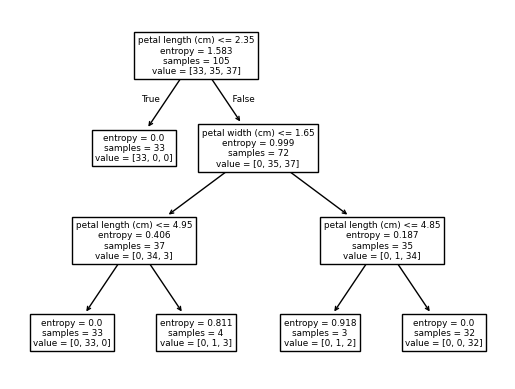

In [25]:
# Looking back to the iris data set, we see that the last level 

# The default criterion is "gini". Changing to entropy yields similar results for this case

# let's fix the maximum depth to 3 to reduce the overfitting
dtree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
# Uncomment next line to set the minimum number of object per leaf 
# dtree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, criterion='entropy')
dtree.fit(X_train,y_train)

y_pred_train = dtree.predict(X_train)
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)

print("Depth of the classification:", dtree.get_depth())
print("Final number of leafs: ", dtree.get_n_leaves())
# print("Parameters of the tree: ", dtree.get_params())

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

plot_tree(dtree, feature_names=iris.feature_names); 

In [26]:
# We can make our choice more objectively using grid search and cross validation 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dtree = DecisionTreeClassifier(random_state=2)

params = {'max_depth' : [2,3,4],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gridsearch = GridSearchCV(dtree, param_grid=params, cv=3)
gridsearch.fit(X,y)
gridsearch.best_params_


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [27]:
dtree = DecisionTreeClassifier(**gridsearch.best_params_)
dtree.fit(X_train,y_train)

y_pred_train = dtree.predict(X_train)
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)

print("Depth of the classification:", dtree.get_depth())
print("Final number of leafs: ", dtree.get_n_leaves())
# print("Parameters of the tree: ", dtree.get_params())

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

#print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
#print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

#plot_tree(dtree, feature_names=iris.feature_names); 

Depth of the classification: 3
Final number of leafs:  5
Accuracy of Decision Tree-Train:  0.9809523809523809
Accuracy of Decision Tree-Test:  0.9777777777777777


In [28]:
X_test.shape, y_test.shape, y_pred.shape

((45, 4), (45,), (45,))

In [29]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      1.000     0.933     0.966        15
           2      0.929     1.000     0.963        13

    accuracy                          0.978        45
   macro avg      0.976     0.978     0.976        45
weighted avg      0.979     0.978     0.978        45



## Ensemble Learning

You may have noticed that each of the classification methods that we have described so far has its strengths and weaknesses. You might wonder if we could gain something by some sort of averaging of weighted "voting". Such a process is what we call ***ensemble learning***.  We'll discuss two such processes: 
- [**bagging**](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
- [**random forests**](https://en.wikipedia.org/wiki/Random_forest)

### Bagging

**Bagging (short for *bootstrap aggregation***) can significantly improve the performance of decision trees. In short, bagging averages the predictive results (= *aggregation*) of a series of ***bootstrap*** samples of the original data.

Remember that instead of splitting the sample into training and test sets that do not overlap, bootstrap says to draw from the observed data set with replacement. So we select indices from the range $\{1,\ldots,N\}$ and this is our new sample.  Some indices will be repeated, and we do this $B$ times.

For a sample of $N$ points in a training set, bagging generates $B$ equally sized bootstrap samples from which to estimate the function $f_i(x)$. The final estimator for $\hat{y}$, defined by bagging, is then

$$\hat{y} = f(x) = \frac{1}{B} \sum_i^B f_i(x).$$

Let's compare how well a regular decision tree performs as compared to bagging applied to an ensemble of decision trees. For this purpose, let's build a relatively "complex" data set made of 2 interleaving half circles. The [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function enables to generate such data. 

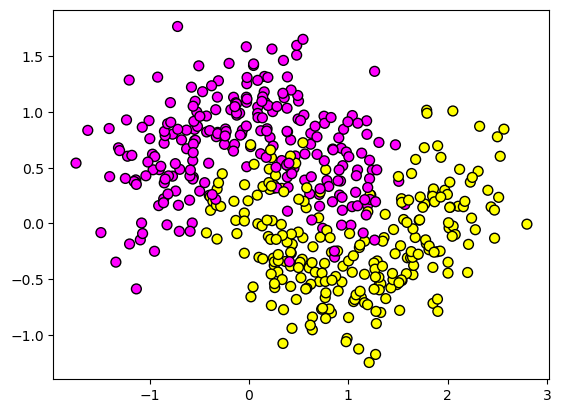

In [30]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap='spring',edgecolor='k')


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Regular Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_test = tree_clf.predict(X_test)
print(classification_report(y_test,y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.803     0.934     0.864        61
           1      0.926     0.781     0.847        64

    accuracy                          0.856       125
   macro avg      0.864     0.858     0.856       125
weighted avg      0.866     0.856     0.855       125



In [32]:
# Bagged Decision Tree 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

%timeit bag_clf.fit(X_train, y_train)

y_pred_bag = bag_clf.predict(X_test)
print(classification_report(y_test,y_pred_bag, digits=3))

275 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
              precision    recall  f1-score   support

           0      0.877     0.934     0.905        61
           1      0.933     0.875     0.903        64

    accuracy                          0.904       125
   macro avg      0.905     0.905     0.904       125
weighted avg      0.906     0.904     0.904       125



=> We see that that both accuracy and precision are improved by the bagging approach. 

Note also above the argument 'n_jobs = -1' that means that you use all the cores of the computer. This illustrates that bagging can be parallelized easily.  

In [33]:
# Let's overplot the decision boundaries
# We use a function from the book of Aurélien Géron listed in the references 
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, 
                                            -1, 1.5], 
                           alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 
             "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 
             "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0, 0.5, '')

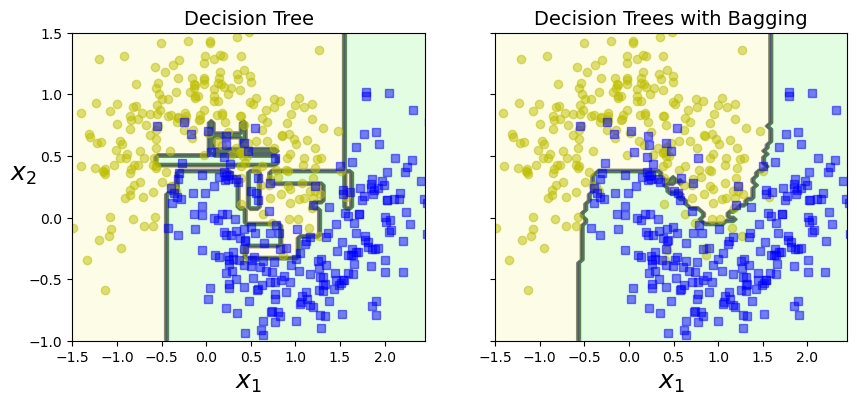

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(ax[0])  # subsequent plt commands will plot in ax[0]
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

plt.sca(ax[1])   # subsequent plt commands will plot in ax[1]
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.ylabel("")

### Random Forests

**[Random forests](https://www.wikiwand.com/en/Random_forest)** extend bagging by generating decision trees from the bootstrap samples.  

- In Random Forests, the ***splitting features on which to generate the tree are selected at random*** from the full set of features in the data.
- The number of features selected per split level is typically the square root of the total number of features, $\sqrt{D}$. 
- The final classification from the random forest is based on the averaging of the classifications of each of the individual decision trees. So, you can literally give it the kitchen sink (including attributes that you might not otherwise think would be useful for classification).
- Random forests help to overcome some of the limitations of decision trees.

As before, **cross-validation can be used to determine the optimal depth**.  Generally the number of trees, $n$, that are chosen is the number at which the cross-validation error plateaus.

The Scikit-Learn's [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) call looks as follows:

In [35]:
from sklearn.ensemble import RandomForestClassifier
# Applying to our "moon sample"
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ranfor = RandomForestClassifier(10)
ranfor.fit(X_train,y_train)

y_pred_rf = ranfor.predict(X_test)
print(classification_report(y_test,y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      0.829     0.951     0.885        61
           1      0.945     0.812     0.874        64

    accuracy                          0.880       125
   macro avg      0.887     0.882     0.880       125
weighted avg      0.888     0.880     0.880       125



For this case, it works less well than the decision tree with bagging. This is not a systematic situation. Random forest methods are better applied when there are many features. 

Text(0, 0.5, '')

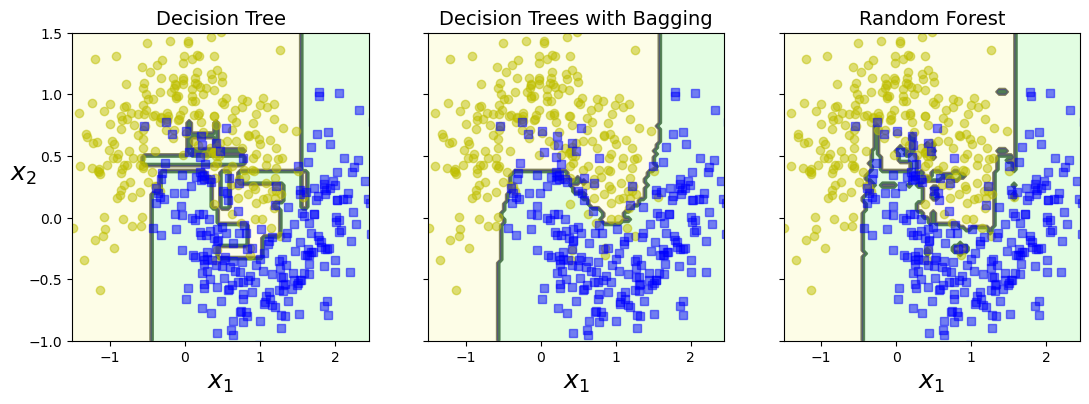

In [36]:
fig, ax = plt.subplots(ncols=3, figsize=(13,4), sharey=True)

plt.sca(ax[0])  # subsequent plt commands will plot in ax[0]
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

plt.sca(ax[1])   # subsequent plt commands will plot in ax[1]
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")

plt.sca(ax[2])   # subsequent plt commands will plot in ax[1]
plot_decision_boundary(ranfor, X, y)
plt.title("Random Forest", fontsize=14)
plt.ylabel("")

### Boosting methods

**[Boosting](https://www.wikiwand.com/en/Gradient_boosting)** is an ensemble approach where many weak (decision tree) classifiers are combined and improved upon to make classification better. ***Boosting creates models that attempt to correct the errors of the ensemble so far.*** 

At the heart of boosting is the idea that we reweight the data based on how incorrectly the data were classified in the previous iteration. This is a core concept in deep learning.

- We run the classification multiple times and each time reweight the data based on the previous performance of the classifier. 
- At the end of this procedure we allow the classifiers to vote on the final classification.



The most popular form of boosting is that of ***adaptive boosting***. In this case we take a weak classifier, $h(x)$, and create a strong classifier, $f(x)$, as

$$ f(x) = \sum_m^B\theta_m h_m(x),$$

where $m$ is the number of iterations and $\theta_m$ is the weight of the classifier in each iteration.  

The idea of boosting is to increase the weight of the misclassified data in each step. The Scikit-Learn's version is [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) which can be found in the  `scikit-learn.ensemble` class. 

A **fundamental limitation** of the boosted decision tree is the computation time for large data sets (they rely on a chain of classifiers which are each dependent on the last), whereas random forests can be easily parallelized as we saw above. For data sets > 10000, sklearn advises to use a variant of the standard boosting [sklearn.ensemble.HistGradientBoostingClassifier]((http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html))  

In [37]:
# An application to the Iris sample ... but it does not improve the accuracy / precision
# at least with the default parameters. 
from sklearn.ensemble import GradientBoostingClassifier

X = iris.data
y = iris.target 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 2)

Gboost = GradientBoostingClassifier()
Gboost.fit(X_train,y_train)

y_pred_GB = Gboost.predict(X_test)
print(classification_report(y_test,y_pred_GB, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      0.933     0.933     0.933        15
           2      0.923     0.923     0.923        13

    accuracy                          0.956        45
   macro avg      0.952     0.952     0.952        45
weighted avg      0.956     0.956     0.956        45



## A short wrap-up and mind mapping

One of the hardest part of solving a machine learning problem is finding the right estimator for the job. There is not classifier that works best all the time! Different estimators are better suited for different types of data and different problems. The [scikit-learn web page](https://scikit-learn.org/stable/index.html) provides a flowchart copied below and whose interactive version is available [here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for helping your choice using scikit-learn tools. This flowchart separates the ML problem into 4 categories: 
- supervised classification
- unsupervised classification, aka clustering
- supervised regression
- unsupervised regression, aka dimensional reduction

![scikitlearn](../Figures/scikit_learn_cheat_sheet.png)


In addition, Table 9.1. of our [book](#book) (Ivezic) gives a summary of the main classifiers, complexity and speed (L-M-H = Low -Medium - High) 

![Classifiers_summary_table.png](../Figures/Classifiers_summary_table.png)

Naive Bayes and its variants are by far the easiest to compute. Linear support vector machines are more expensive, though several fast algorithms exist. Random forests can be easily parallelized. 

## Tips about online astronomical data sets 

There is an increasing amount of astronomical "data" available (either real data from big surveys or simulations). You'll find links in our [book](#book) (mostly) to data from the SDSS survey that you can mine. Another good place to mine archival data is via the [european virtual observatory](https://www.euro-vo.org/) and the [IVOA](https://www.ivoa.net/), [Aladin and CDS / Vizier](https://cdsweb.u-strasbg.fr) in Strasbourg. The following [github](https://github.com/cds-astro/tutorials) provides a variety of Notebooks that allow you to search data/catalogs available in CDS. A useful module for probing astronomical databases is [astroquery](https://astroquery.readthedocs.io/en/latest/). This list is not exhaustive, but if you have unexplored ideas and seek data to test them, you at least have a few starting points... 

## A final word before applying ML to a problem 

Machine learning is very powerful is solving a series of problems it does not systematically do better than more "standard techniques". Before applying machine learning to a problem, you should always consider reviewing the state-of-the art in the scientific field into which you apply it. A series of clever recommendantions has been compiled in the following paper by Huppenkhoten et al. 2023 ([https://arxiv.org/abs/2310.12528](https://arxiv.org/abs/2310.12528)). They also list recommendations in terms of presentation of the results in order to enable reproductibility of your research. The figure below, extracted from that paper, summarizes those recommendations. 

![ML_Good_Practice](../Figures/ML_Good_Practice.png)

I strongly encourage you to read this paper before you apply machine learning to a problem for a future publication. 

Finally, the Figure 3 of the same paper may help you to select a machine learning solution (we've not covered them all in this class) to your problem, with references (that might become obsolete at more or less short term ...) giving you an overview of astronomical applications of those methods. 

![ML_Choosing_a_model.png](../Figures/ML_Choosing_a_model.png)

## Exercise

An notebook with a possible solution of today's exercise is available in [Classification_Exr.ipynb](Classification_Exr.ipynb)

This is an rather open ended exercise: 

- Exr #1: Apply classification methods to the handwritten digits data set: import the digit data set (`from sklearn.datasets import load_digits`; cf Clustering Notebook lecture) and compare the various classification algorithms we have seen. 

- Exr #2: Apply and compare the various classification algorithms we have seen to classification of lightcurves of flaring stars. (more info [here](https://spacetelescope.github.io/hellouniverse/notebooks/hello-universe/Classifying_TESS_flares_with_CNNs/Classifying_TESS_flares_with_CNNs.html) and in [Feinstein et al. 2020.](https://iopscience.iop.org/article/10.3847/1538-3881/abac0a)) For this purpose, you should dowload a fits file containing the labeled training, test and validation sets, and create arrays with the data following the commands below (if you do not succeed to download the file, ask me, I have a copy):
```python
from astropy.io import fits
from astropy.utils.data import download_file
file_url = 'https://archive.stsci.edu/hlsps/hellouniverse/hellouniverse_stella_500.fits'
hdu = fits.open(download_file(file_url, cache=True))
train_data = hdu[1].data['train_data']
train_labels = hdu[1].data['train_labels']

test_data = hdu[2].data['test_data']
test_labels = hdu[2].data['test_labels']

val_data = hdu[3].data['val_data']
val_labels = hdu[3].data['val_labels']
```

## References: 

- Chapter 9 of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 
- Astro-statistics lecture by Davide Gerosa (also using the above book as a reference): https://github.com/dgerosa/astrostatistics_bicocca_2022  (in particular lectures 19 and 20)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
- Scikit-learn: Machine Learning in Python, Pedregosa, F. et al. 2011, Journal of Machine Learning Research, 12, 2825.
-  ["Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow", Aurelien Geron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).
-  Huppenkhoten et al. 2023 ([https://arxiv.org/abs/2310.12528](https://arxiv.org/abs/2310.12528)): Constructing Impactful Machine Learning Research for Astronomy: Best Practices for Researchers and Reviewers 